In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("cardio_train.csv", sep = ';')
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [4]:
# verifier si on a la valeur NaN existe dans le dataframe, ici il n'y a pas de NaN car la fonction retoure False 
data.isnull().values.any()

False

On remarque qu'il y a des valeurs aberrantes concernant les colonnes "ap_lo" et "ap_hi" car les normes pour ces 2 valeurs sont : 
- 80 < ap_hi < 120
- ap_lo < 90

In [5]:
#print('ap_hi < 400 = ', (data['ap_hi'] > 400).value_counts())
#print()
#print('ap_lo < 400 = ', (data['ap_lo'] > 400).value_counts())

In [6]:
#data = data.loc[(data['ap_hi'] < 400)]
#data = data.loc[(data['ap_lo'] < 400)]
#data.head(10)

In [7]:
df = data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']]
df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Pour calculer les corrélations sur un ensemble de colonnes
matrice_corr = df.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.0,-0.0202,-0.0823,0.0616,0.219,0.157,0.14,0.0918,-0.0475,-0.0301,-0.0104,0.234
gender,-0.0202,1.0,0.534,0.172,0.0632,0.0664,-0.0357,-0.0189,0.338,0.171,0.00587,0.00811
height,-0.0823,0.534,1.0,0.314,0.0194,0.0305,-0.0589,-0.0244,0.198,0.0967,-0.00737,-0.0124
weight,0.0616,0.172,0.314,1.0,0.278,0.254,0.138,0.11,0.0717,0.0681,-0.0149,0.183
ap_hi,0.219,0.0632,0.0194,0.278,1.0,0.735,0.209,0.105,0.0289,0.0332,-0.00127,0.452
ap_lo,0.157,0.0664,0.0305,0.254,0.735,1.0,0.167,0.0825,0.0262,0.0389,0.0034,0.363
cholesterol,0.14,-0.0357,-0.0589,0.138,0.209,0.167,1.0,0.408,0.0152,0.0413,0.00757,0.215
gluc,0.0918,-0.0189,-0.0244,0.11,0.105,0.0825,0.408,1.0,0.000468,0.0186,-0.00861,0.0915
smoke,-0.0475,0.338,0.198,0.0717,0.0289,0.0262,0.0152,0.000468,1.0,0.34,0.0259,-0.0155
alco,-0.0301,0.171,0.0967,0.0681,0.0332,0.0389,0.0413,0.0186,0.34,1.0,0.0255,-0.00733


<AxesSubplot:xlabel='weight'>

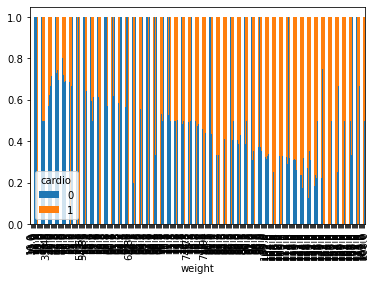

In [9]:
# voir si le weight a une influence sur la maladie
table = pd.crosstab(df.weight, df.cardio)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

On remarque que le poids a une influence sur la maladie

<AxesSubplot:xlabel='smoke'>

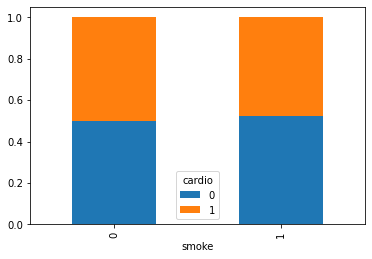

In [10]:
# voir si le smoke a une influence sur la maladie
table = pd.crosstab(df.smoke, df.cardio)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='alco'>

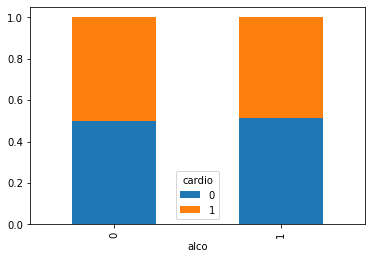

In [11]:
# voir si l'alcol a une influence sur la maladie
table = pd.crosstab(df.alco, df.cardio)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [12]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Afficher les variables par ordre d'importance en utilisant l'algorithme Random Forest sans preprocessing des données

In [13]:
X = df.drop('cardio', axis = 1)
y = df.cardio

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
liste_variables = list(X)

Text(0.5, 0, 'Relative Importance')

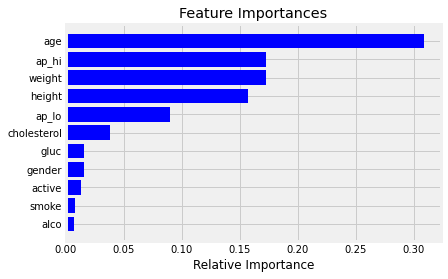

In [16]:
import numpy as np


importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

On remarque qu'il y 5 variables qui ont une influence sur le y "la maladie":
- age
- ap_hi
- weight
- height
- ap_lo

## Afficher les variables par ordre d'importance en utilisant l'algorithme Random Forest avec preprocessing des données

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


rf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

Text(0.5, 0, 'Relative Importance')

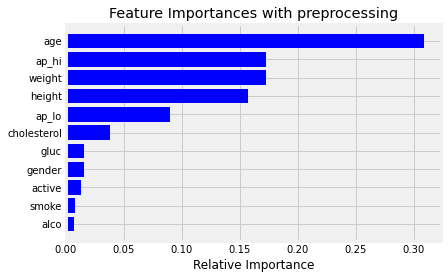

In [18]:
importances1 = rf1.named_steps['classifier'].feature_importances_#car j'ai utilisé un Pipeline
indices1 = np.argsort(importances1)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances with preprocessing')
plt.barh(range(len(indices1)), importances1[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), [liste_variables[i] for i in indices1])
plt.xlabel('Relative Importance')

On remarque qu'on a obtenu les mêmes 5 variables (sans le preprocessing des données)qui ont une influence sur le y "la maladie" :

- age
- ap_hi
- weight
- height
- ap_lo

# Random Forest avec (n_estimators = 10 )

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

In [20]:
#model Random Forest
Rd = RandomForestClassifier(n_estimators = 10, random_state=42)
Rd.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [21]:
y_pred = Rd.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [22]:
# la moyenne des y_pred True sur l'ensemble de jeu de test 
print(np.sum(y_pred == y_test)/x_test.shape[0])

0.7017142857142857


In [23]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.7017142857142857


In [24]:
print(classification_report(y_test, y_pred, target_names=['NO','YES']))

              precision    recall  f1-score   support

          NO       0.68      0.75      0.71     10461
         YES       0.72      0.66      0.69     10539

    accuracy                           0.70     21000
   macro avg       0.70      0.70      0.70     21000
weighted avg       0.70      0.70      0.70     21000



# Random Forest avec (n_estimators = 100 )

In [25]:
Rd1 = RandomForestClassifier(n_estimators = 100, random_state=42)
Rd1.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred1 = Rd1.predict(x_test)
y_pred1

array([1, 1, 1, ..., 0, 1, 1])

In [27]:
# la moyenne des y_pred True sur l'ensemble de jeu de test 
print(np.sum(y_pred1 == y_test)/x_test.shape[0])

0.7155238095238096


In [28]:
print('Accuracy', accuracy_score(y_test, y_pred1))

Accuracy 0.7155238095238096


In [32]:
print(classification_report(y_test, y_pred1, target_names=['NO','YES']))

              precision    recall  f1-score   support

          NO       0.71      0.73      0.72     10461
         YES       0.72      0.70      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



On remarque qu'en augmentant le n_estimators de 10 à 100 la moyenne des y_pred True a augmentée de 0.70171 à 0.71552

## Trouver les meilleurs paramètres pour le Random Forest en utilisant GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV
from time import time

parametres = {'n_estimators': np.arange(100, 400, 50),'max_depth': np.arange(10, 20, 5), 'min_samples_leaf': np.arange(10, 35,5)}
start = time()
model_grid = GridSearchCV(RandomForestClassifier(), parametres, cv=3)

model_grid.fit(x_train, y_train)
t1 = time()-start
t1 = round(t1,3)
print("Time = {} secondes".format(t1))

Time = 4548.443 secondes


In [35]:
print('Best score = ',model_grid.best_score_)
print('Best parametres = ',model_grid.best_params_)

Best score =  0.7346938756640901
Best parametres =  {'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 350}


### On garde le model avec les meilleurs parametres  {'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 350} pour la suite 

In [36]:
model = model_grid.best_estimator_
model.score(x_test, y_test)

0.7398095238095238

In [39]:
y_prediction = model.predict(x_test)
y_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
print('Accuracy', accuracy_score(y_test, y_prediction))

Accuracy 0.7398095238095238


In [41]:
print(classification_report(y_test, y_prediction, target_names=['NO','YES']))

              precision    recall  f1-score   support

          NO       0.72      0.78      0.75     10461
         YES       0.76      0.70      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



### Prédir si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires.

In [42]:
mean_ap_hi = 128.817286
Quartile_ap_lo = 90

### prediction avec "alco" = 0

In [44]:
x_predict = np.array([19345,2,175,85,mean_ap_hi,Quartile_ap_lo,2,1,1,0,1]).reshape(1,11)
prediction = model.predict(x_predict)
prediction

array([1])

In [48]:
print(model.predict_proba(x_predict))

[[0.47286262 0.52713738]]


#### Dans ce cas Arthur est un sujet à risque cardio-vasculaire avec une probabilité de 0.4728 pour NON et 0.527 pour OUI

### prediction avec "alco" = 1

In [45]:
x_predict1 = np.array([19345,2,175,85,mean_ap_hi,Quartile_ap_lo,2,1,1,1,1]).reshape(1,11)
prediction1 = model.predict(x_predict1)
prediction1

array([1])

In [49]:
print(model.predict_proba(x_predict1))

[[0.4958984 0.5041016]]


#### Dans ce cas Arthur est un sujet à risque cardio-vasculaire avec une probabilité de 0.4958 pour NON et 0.5041 pour OUI

# Comparaison RandomForest, KNN, LogesticRegression 

### Trouver les Best Parameters du KNN pour faire la comparaison avec le RandomForest

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)


parametres = {'n_neighbors': np.arange(2, 20, 3)}

model_grid = GridSearchCV(KNeighborsClassifier(), parametres, cv=3)

model_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  5,  8, 11, 14, 17])})

In [70]:
print('Best score = ',model_grid.best_score_)
print('Best parametres = ',model_grid.best_params_)

Best score =  0.7019387511058198
Best parametres =  {'n_neighbors': 17}


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.svm import SVC
from sklearn import svm



#fractionner les données
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3 ,random_state=42)

#choisir le model et le preprocessing
pipe0 = Pipeline([ ('KNN', KNeighborsClassifier(n_neighbors=17))])
pipe1 = Pipeline([ ('LG', LogisticRegression())])
pipe2 = Pipeline([('RF', RandomForestClassifier(max_depth= 15, min_samples_leaf= 20, n_estimators= 250))])
pipe3 = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=17))])
pipe4 = Pipeline([('scaler', StandardScaler()), ('LG', LogisticRegression())])
pipe5 = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier(max_depth= 15, min_samples_leaf = 20, n_estimators= 250))])
pipes = [pipe0, pipe1, pipe2, pipe3, pipe4, pipe5]

def pipe_models():
    ar = []
    tableau = {}
    for pipe in pipes:
        pipe.fit(X_train, Y_train)

        #calcul y_pred 
        Y_pred = pipe.predict(X_test)
        
        #matrice de confusion
        print("matrice de confusion {}): \n".format(pipe),confusion_matrix(Y_test,Y_pred))
        print("-"*50)

        #culcule des metrics
        score_test = pipe.score(X_test, Y_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred, average='macro')
        f1_score_0 = f1_score(Y_test, Y_pred, pos_label=0)
        f1_score_1 = f1_score(Y_test, Y_pred, pos_label=1)
        resultats = [[score_test,accuracy,precision,f1_score_0,f1_score_1]]
        ar.extend(resultats)

    #creer le dataframe pour afficher un tableau    
    arr = np.array(ar)
    DF = pd.DataFrame(arr, index = ['KNN','LG','RandomForest','KNN + Scaler','LG + scaler','RandomForest + scaler'],
                    columns=['score_test','accuracy','precision','f1_score_0','f1_score_1'])
    return DF

In [47]:
pipe_models()

matrice de confusion Pipeline(steps=[('KNN', KNeighborsClassifier(n_neighbors=17))])): 
 [[7838 2623]
 [3469 7070]]
--------------------------------------------------


/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


matrice de confusion Pipeline(steps=[('LG', LogisticRegression())])): 
 [[7618 2843]
 [3467 7072]]
--------------------------------------------------
matrice de confusion Pipeline(steps=[('RF',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=20,
                                        n_estimators=250))])): 
 [[8177 2284]
 [3181 7358]]
--------------------------------------------------
matrice de confusion Pipeline(steps=[('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=17))])): 
 [[7192 3269]
 [3778 6761]]
--------------------------------------------------
matrice de confusion Pipeline(steps=[('scaler', StandardScaler()), ('LG', LogisticRegression())])): 
 [[7965 2496]
 [3386 7153]]
--------------------------------------------------
matrice de confusion Pipeline(steps=[('scaler', StandardScaler()),
                ('RF',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=20,
                              

,score_test,accuracy,precision,f1_score_0,f1_score_1
KNN,0.709905,0.709905,0.711296,0.720140,0.698893
LG,0.699524,0.699524,0.700249,0.707138,0.691503
RandomForest,0.739762,0.739762,0.741526,0.749530,0.729201
KNN + Scaler,0.664429,0.664429,0.664842,0.671177,0.657397
LG + scaler,0.719905,0.719905,0.721510,0.730332,0.708639
RandomForest + scaler,0.739571,0.739571,0.741295,0.749232,0.729137


### On remarque que le meilleur model est le RandomForest + StandardScaler on obtient une precision = 0.741295 et une accuracy = 0.739571